# Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository.

For this project, you'll be cleaning and exploring the data set in Jupyter notebook. 

The data has several columns, including:

- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [3]:
star_wars.head()

RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                                Yes                      
2                                                NaN                      
3                                                 No                      
4                                                Yes                      
5                                                Yes                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
1           Star Wars: Episode I  The Phantom Menace                                    
2                                                NaN                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    
5           Star Wars: Episode I  The Phantom Menace                                    

                                       Column1  \
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   
5  Star Wars: Episode II  Attack of the Clones   

                                            _1  \
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   
5  Star Wars: Episode III  Revenge of the Sith   

                                  _2  \
1  Star Wars: Episode IV  A New Hope   
2                                NaN   
3                                NaN   
4  Star Wars: Episode IV  A New Hope   
5  Star Wars: Episode IV  A New Hope   

                                             _3  \
1  Star Wars: Episode V The Empire Strikes Back   
2                                           NaN   
3                                           NaN   
4  Star Wars: Episode V The Empire Strikes Back   
5  Star Wars: Episode V The Empire Strikes Back   

                                         _4  \
1  Star Wars: Episode VI Return of the Jedi   
2                                       NaN   
3                                       NaN   
4  Star Wars: Episode VI Return of the Jedi   
5  Star Wars: Episode VI Return of the Jedi   

  Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
1                                                  3                                                                                              
2                                                NaN                                                                                              
3                                                  1                                                                                              
4                                                  5                                                                                              
5                                                  5                                                                                              

   ...                 _22       Which character shot first?  \
1  ...      Very favorably  I don't understand this question   
2  ...                 NaN                               NaN   
3  ...    Unfamiliar (N/A)  

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Column1', '_1', '_2', '_3', '_4',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       '_5', '_6', '_7', '_8', '_9',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       '_10', '_11', '_12', '_13', '_14', '_15', '_16', '_17', '_18', '_19',
       '_20', '_21', '_22', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?æ',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Inco

In [5]:
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars.head()

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
1           Star Wars: Episode I  The Phantom Menace                                    
2                                                NaN                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    
5           Star Wars: Episode I  The Phantom Menace                                    

                                       Column1  \
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   
5  Star Wars: Episode II  Attack of the Clones   

                                            _1  \
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   
5  Star Wars: Episode III  Revenge of the Sith   

                                  _2  \
1  Star Wars: Episode IV  A New Hope   
2                                NaN   
3                                NaN   
4  Star Wars: Episode IV  A New Hope   
5  Star Wars: Episode IV  A New Hope   

                                             _3  \
1  Star Wars: Episode V The Empire Strikes Back   
2                                           NaN   
3                                           NaN   
4  Star Wars: Episode V The Empire Strikes Back   
5  Star Wars: Episode V The Empire Strikes Back   

                                         _4  \
1  Star Wars: Episode VI Return of the Jedi   
2                                       NaN   
3                                       NaN   
4  Star Wars: Episode VI Return of the Jedi   
5  Star Wars: Episode VI Return of the Jedi   

  Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
1                                                  3                                                                                              
2                                                NaN                                                                                              
3                                                  1                                                                                              
4                                                  5                                                                                              
5                                                  5                                                                                              

   ...                 _22       Which character shot first?  \
1  ...      Very favorably  I don't understand this question   
2  ...                 NaN                               NaN   
3  ...    Unfamiliar (

In [6]:
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [7]:

star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

   seen_1  Column1     _1     _2     _3     _4  \
1    True     True   True   True   True   True   
2   False    False  False  False  False  False   
3    True     True   True  False  False  False   
4    True     True   True   True   True   True   
5    True     True   True   True   True   True   

  Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
1                                                  3                                                                                              
2                                                NaN                                                                                              
3                                                  1                                                                                              
4                                                  5                                                                                              
5                                                  5                                                                                              

   ...                 _22       Which character shot first?  \
1  ...      Very favorably  I don't understand this question   
2  ...                 NaN                               NaN   
3  ...    Unfamiliar (N/A)  I don't understand this question   
4  ...      Very favorably  I don't understand this question   
5  ...  Somewhat favorably                            Greedo   

  Are you familiar with the Expanded Universe?  \
1                                          Yes   
2                                          NaN   
3                                           No   
4                                           No   
5                                          Yes   

  Do you consider yourself to be a fan of the Expanded Universe?æ  \
1                                                 No                 
2                                                NaN                 
3                                                NaN                 
4                                                NaN                 
5                                                 No                 

  Do you consider yourself to be a fan of the Star Trek franchise? Gender  \
1                                                 No                 Male   
2                                                Yes                 Male   
3                                                 No                 Male   
4                                                Yes                 Male   
5                                                 No                 Male   

     Age     Household Income                         Education  \
1  18-29                  NaN                High school degree   
2  18-29         $0 - $24,999                   Bachelor degree   
3  18-29         $0 - $24,999                High school degree   
4  18-29  $100,000 - $149,999  Some college

In [8]:

star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.head()

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

   seen_1  Column1     _1     _2     _3     _4 ranking_1  ...  \
1    True     True   True   True   True   True         3  ...   
2   False    False  False  False  False  False       NaN  ...   
3    True     True   True  False  False  False         1  ...   
4    True     True   True   True   True   True         5  ...   
5    True     True   True   True   True   True         5  ...   

                  _22       Which character shot first?  \
1      Very favorably  I don't understand this question   
2                 NaN                               NaN   
3    Unfamiliar (N/A)  I don't understand this question   
4      Very favorably  I don't understand this question   
5  Somewhat favorably                            Greedo   

  Are you familiar with the Expanded Universe?  \
1                                          Yes   
2                                          NaN   
3                                           No   
4                                           No   
5                                          Yes   

  Do you consider yourself to be a fan of the Expanded Universe?æ  \
1                                                 No                 
2                                                NaN                 
3                                                NaN                 
4                                                NaN                 
5                                                 No                 

  Do you consider yourself to be a fan of the Star Trek franchise? Gender  \
1                                                 No                 Male   
2                                                Yes                 Male   
3                                                 No                 Male   
4                                                Yes                 Male   
5                                                 No                 Male   

     Age     Household Income                         Education  \
1  18-29                  NaN                High school degree   
2  18-29         $0 - $24,999                   Bachelor degree   
3  18-29         $0 - $24,999                High school degree   
4  18-29  $100,000 - $149,999  Some college or Associate degree   
5  18-29  $100,000 - $149,999  Some college or Associate degree   

  Location (Census Region)  
1           South Atlantic  
2       West South Central  
3       West North Central  
4       West North Central  
5       West North Central  

[5 rows x 38 columns]

In [9]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [10]:

star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
_5           4.087321
_6           4.341317
_7           3.272727
_8           2.513158
_9           3.047847
dtype: float64

<BarContainer object of 6 artists>

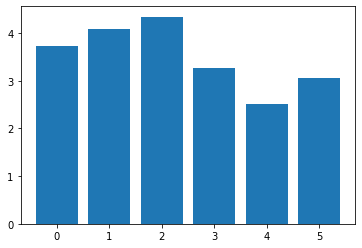

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())

# Rankings

So far, we've cleaned up the data, renamed several columns, and computed the average ranking of each movie. As I suspected, it looks like the "original" movies are rated much more highly than the newer ones.

In [12]:
star_wars[star_wars.columns[3:9]].sum()

seen_1     673
Column1    571
_1         550
_2         607
_3         758
_4         738
dtype: int64

<BarContainer object of 6 artists>

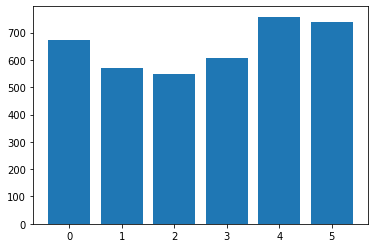

In [13]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())

# View counts

It appears that the original movies were seen by more respondents than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.

In [14]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

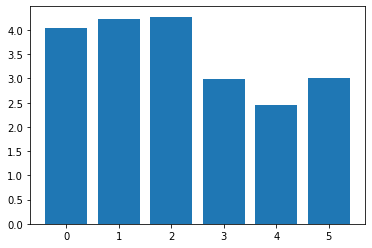

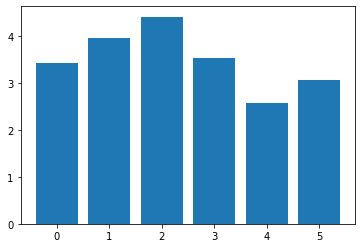

In [15]:
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean())
plt.show()

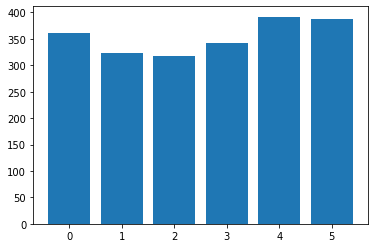

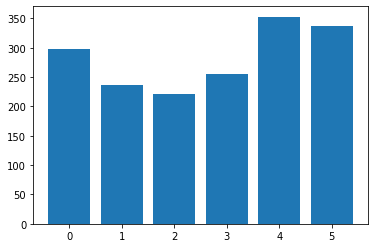

In [16]:
plt.bar(range(6), males[males.columns[3:9]].sum())
plt.show()

plt.bar(range(6), females[females.columns[3:9]].sum())
plt.show()

# Male/Female differences in favorite Star Wars movie and most seen movie

Interestingly, more males watched episodes 1-3, but males liked them far less than females did.